In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassava-leaf-disease-classification/sample_submission.csv
/kaggle/input/cassava-leaf-disease-classification/label_num_to_disease_map.json
/kaggle/input/cassava-leaf-disease-classification/train.csv
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train14-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train13-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train04-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train01-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train08-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train00-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train10-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train02-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train15-1327.tf

In [4]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

(600, 800, 3)

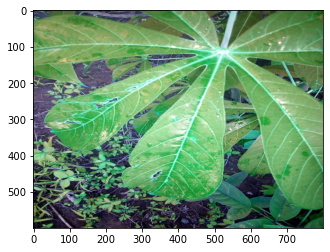

In [6]:
pic1=cv2.imread('../input/cassava-leaf-disease-classification/train_images/1003442061.jpg')
plt.imshow(pic1)
pic1.shape

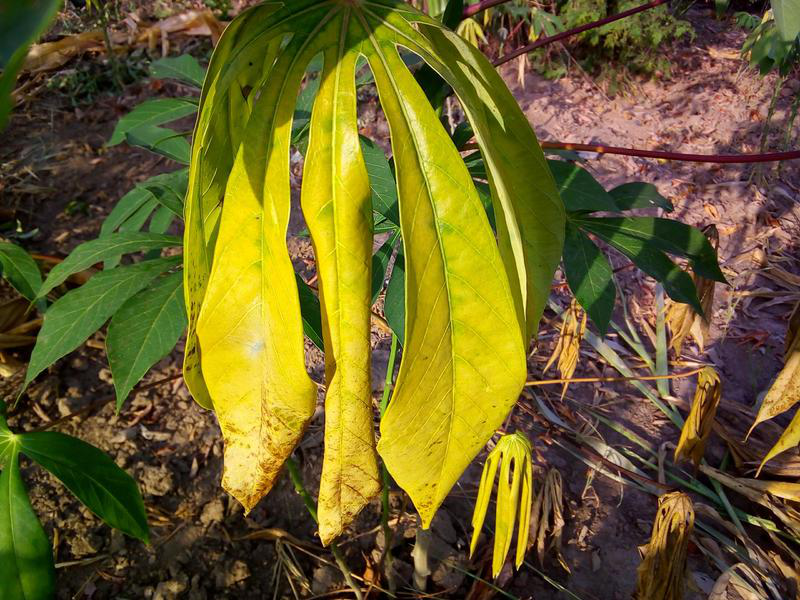

In [7]:
Image.open('../input/cassava-leaf-disease-classification/train_images/1003888281.jpg')


In [8]:
df=pd.read_csv('../input/cassava-leaf-disease-classification/train.csv')

In [9]:
df.head(20)

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
5,1000837476.jpg,3
6,1000910826.jpg,2
7,1001320321.jpg,0
8,1001723730.jpg,4
9,1001742395.jpg,3


In [10]:
efficientnetmodel=tf.keras.applications.efficientnet.EfficientNetB7(include_top=False, input_shape=(224,224,3))

258080768/258076736 [==============================] - 3s 0us/step


In [11]:
df.label.unique()

array([0, 3, 1, 2, 4])

In [12]:
efficientnetmodel.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [13]:
x=tf.keras.layers.Flatten()(efficientnetmodel.output)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dense(5,activation='softmax')(x)

In [14]:
finalModel=tf.keras.models.Model(inputs=efficientnetmodel.input, outputs=x)

In [15]:
finalModel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [16]:
newModel=finalModel.compile(loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

In [17]:
es=tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [18]:
idg=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

In [19]:
df['label']=df['label'].astype('string')

In [20]:
train_idg=idg.flow_from_dataframe(df,'../input/cassava-leaf-disease-classification/train_images',x_col='image_id',y_col='label',target_size=(224,224),batch_size=8,subset='training')
val_idg=idg.flow_from_dataframe(df,'../input/cassava-leaf-disease-classification/train_images',x_col='image_id',y_col='label',target_size=(224,224),batch_size=8,subset='validation')

Found 17118 validated image filenames belonging to 5 classes.
Found 4279 validated image filenames belonging to 5 classes.


In [21]:
finalModel_history=finalModel.fit(train_idg,epochs=50,validation_data=val_idg,callbacks=[es])

Epoch 1/50
2140/2140 [==============================] - 974s 433ms/step - loss: 4.4060 - acc: 0.5396 - val_loss: 1.5218 - val_acc: 0.6165
Epoch 2/50
2140/2140 [==============================] - 908s 424ms/step - loss: 1.0451 - acc: 0.6223 - val_loss: 2.3214 - val_acc: 0.6165
Epoch 3/50
2140/2140 [==============================] - 910s 425ms/step - loss: 0.9829 - acc: 0.6609 - val_loss: 1.6654 - val_acc: 0.1372
Epoch 4/50
2140/2140 [==============================] - 905s 423ms/step - loss: 0.9572 - acc: 0.6671 - val_loss: 1.7497 - val_acc: 0.1192
Epoch 5/50
2140/2140 [==============================] - 908s 424ms/step - loss: 0.9548 - acc: 0.6689 - val_loss: 1.7151 - val_acc: 0.1140
Epoch 6/50
2140/2140 [==============================] - 906s 423ms/step - loss: 0.9827 - acc: 0.6686 - val_loss: 1.7758 - val_acc: 0.1253
Epoch 7/50
2140/2140 [==============================] - 910s 425ms/step - loss: 0.9736 - acc: 0.6676 - val_loss: 151.6272 - val_acc: 0.3615
Epoch 8/50
2140/2140 [==========

In [ ]:
finalModel.save("model1")